<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/Average_Electricity_Price_Volatility_Return_Correlation_with_Spearman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import spearmanr
import requests
from google.colab import userdata
fred_key = userdata.get('fred')

In [ ]:
URL_BASE = 'https://api.stlouisfed.org/'
ENDPOINT = 'fred/series/observations'

URL = URL_BASE + ENDPOINT

API_KEY = fred_key
INDICATOR = 'APUS12A72610'

params = {
    'api_key': API_KEY,
    'series_id': INDICATOR,
    'file_type': 'json'
}

res = requests.get(URL, params=params)
data = res.json()
df = pd.DataFrame(data['observations'])
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

df['date'] = pd.to_datetime(df['date'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df = df.set_index('date')
df.rename(columns={'value': 'electric_price'}, inplace=True)
df.head()

,electric_price
date,
1978-11-01,0.089
1978-12-01,0.090
1979-01-01,0.088
1979-02-01,0.089
1979-03-01,0.089


In [ ]:
df.isna().sum()

,0
electric_price,1


In [ ]:
df[df.isnull().any(axis=1)]

,electric_price
date,
1985-09-01,NaN


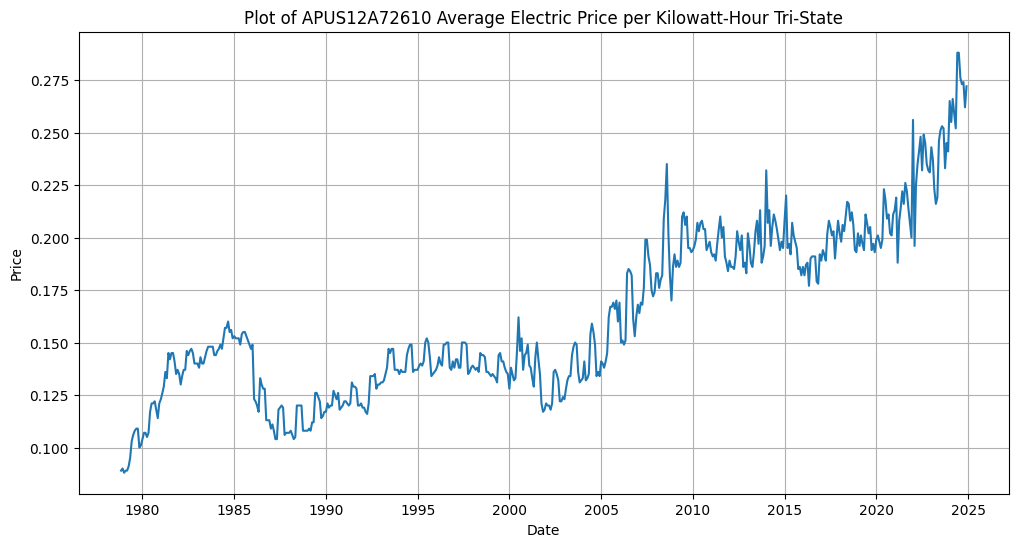

In [ ]:
df.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['electric_price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Plot of {INDICATOR} Average Electric Price per Kilowatt-Hour Tri-State')
plt.grid(True)
plt.show()

In [ ]:
df['electric_vol'] = df['electric_price'].rolling(window=6).std()
df

,electric_price,electric_vol
date,,
1978-11-01,0.089,NaN
1978-12-01,0.090,NaN
1979-01-01,0.088,NaN
1979-02-01,0.089,NaN
1979-03-01,0.089,NaN
...,...,...
2024-08-01,0.276,0.015043
2024-09-01,0.273,0.014801
2024-10-01,0.274,0.013212


In [ ]:
import yfinance as yf

start = '1978-11-01'
end = '2024-12-01'

data = yf.download('ED', start, end,interval='1mo')['Close']
data.head()

[*********************100%***********************]  1 of 1 completed


Ticker,ED
Date,
1985-01-01,1.799504
1985-02-01,1.898153
1985-03-01,2.007064
1985-04-01,2.045960
1985-05-01,2.209325


In [ ]:
data['ED_vol'] = data['ED'].rolling(window=6).std()

In [ ]:
df = pd.concat([df, data], axis=1).dropna()
df.head()

,electric_price,electric_vol,ED,ED_vol
1985-06-01,0.154,0.001673,2.353914,0.202673
1985-07-01,0.155,0.002066,2.155773,0.161873
1985-08-01,0.155,0.002317,2.211253,0.125686
1985-10-01,0.151,0.002422,2.283247,0.073650
1985-11-01,0.149,0.002858,2.395790,0.097619


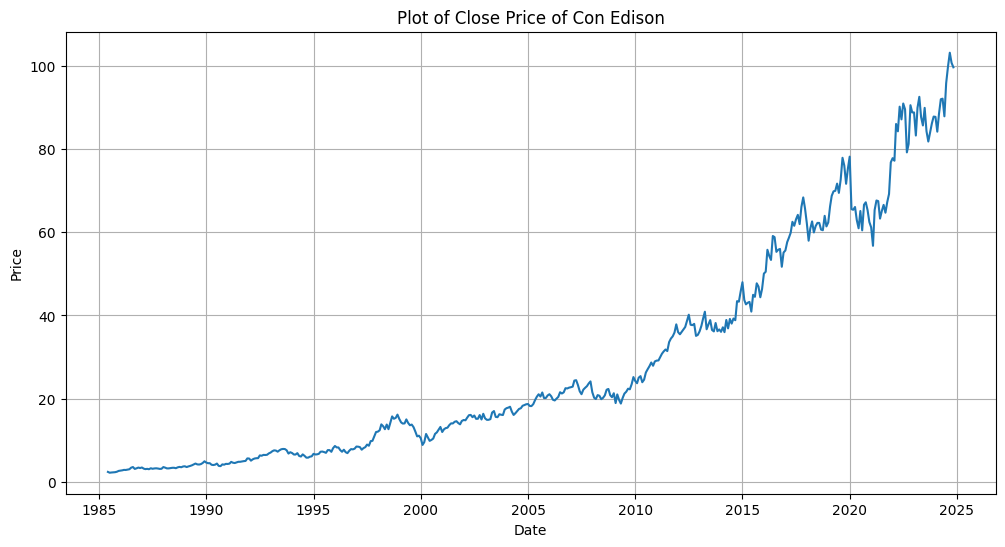

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ED'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Plot of Close Price of Con Edison')
plt.grid(True)
plt.show()

Spearman correlation: 0.828


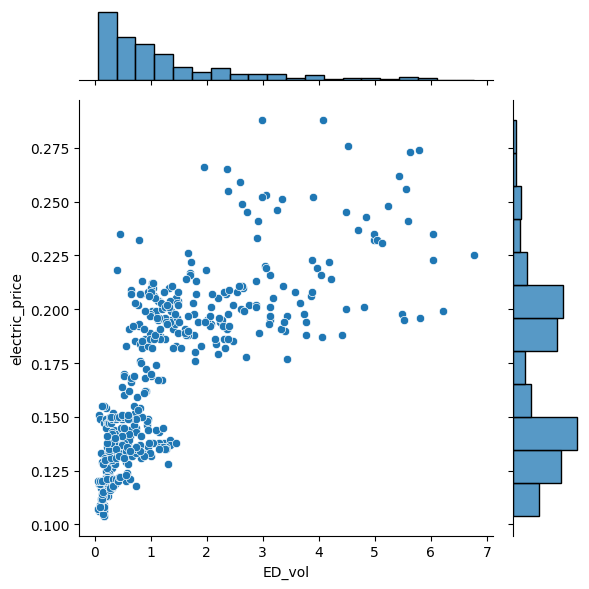

In [ ]:
target = 'electric_price'
metric = 'ED_vol'
j = sns.jointplot(x=metric, y=target, data=df)
plt.tight_layout()
df1 = df[[metric, target]].dropna()
r, p = spearmanr(df1[metric], df1[target])
print(f'Spearman correlation: {r:.3f}')

#Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi